In [1]:
import pandas as pd
import numpy as np

In [5]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    ## null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    ## null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    # if any variable as null value greater than input(like 30% of the data) value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

In [11]:
base_dataset_train,cat,cont=null_values(df_train)
base_dataset_test,cat,cont=null_values(df_test)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [12]:
from sklearn.preprocessing import LabelEncoder
def label_encoders(data,cat):
    le=LabelEncoder()
    for i in cat:
        le.fit(data[i])
        x=le.transform(data[i])
        data[i]=x
    return data

In [17]:
base_dataset_train=label_encoders(base_dataset_train,cat)
base_dataset_test=label_encoders(base_dataset_test,cat)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

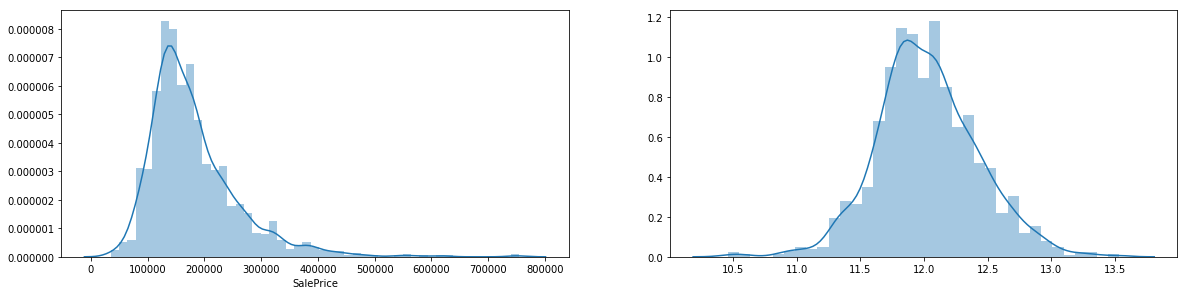

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(base_dataset_train['SalePrice'])
plt.subplot(2,2,2)
sns.distplot(np.log(base_dataset_train['SalePrice'].values))

In [47]:
y=np.log(base_dataset_train['SalePrice'].values)
x=base_dataset_train.drop('SalePrice',axis=1)

In [48]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(x,y)
np.exp(ln.predict(x))

array([205754.89783935, 201686.2581442 , 217882.85191356, ...,
       232417.85162544, 143748.73794064, 150014.76955443])

In [49]:
pd.DataFrame(np.exp(ln.predict(base_dataset_test))).to_excel("sample submission.xlsx")

In [50]:
pwd

'C:\\Users\\Ganapathy\\Desktop\\Ganapathy\\A6 class'